In [7]:
# Opimize a SVR with Newuoa algorihm 
# Import all bibs
import pdfo as pf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.svm import SVR
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics.pairwise import rbf_kernel
from mpl_toolkits.mplot3d import Axes3D


In [8]:
# Set 70 datapoints 
np.random.seed(1)
n = 70
lower = [-2.5,-1.5]
upper = [1.5,2.5]
x = np.column_stack((np.random.uniform(lower[0], upper[0], n), np.random.uniform(lower[1], upper[1], n)))
f = lambda x: 20 + x[:,0]**2 + x[:,1]**2 - 10*(np.cos(2*np.pi*x[:,0]) + np.cos(2*np.pi*x[:,1]))
y = f(x)

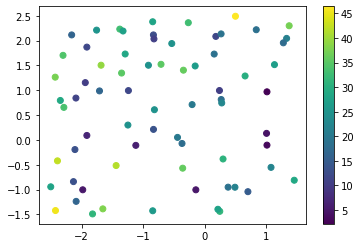

In [9]:

# Create a dataframe withe the datapoints
df = pd.DataFrame({'x.1': x[:, 0], 'x.2': x[:, 1], 'y': y})

# Create a color map using the viridis colors
cmap = cm.viridis

# Plot the points
plt.scatter(x=df['x.1'], y=df['x.2'], c=df['y'], cmap=cmap)
plt.colorbar()
plt.show()

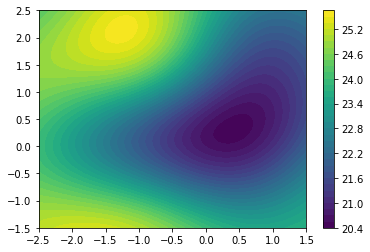

In [10]:
np.random.seed(1)

# Generate a SVR with the datapoints
model = SVR(kernel='rbf', gamma='auto', C=1.0, epsilon=0.1, tol=1e-3)
model.fit(x, y)

nplot_dim = 100

xplot = np.meshgrid(np.linspace(lower[0], upper[0], nplot_dim), 
                    np.linspace(lower[1], upper[1], nplot_dim))
xplot_flat = np.column_stack([xplot[0].ravel(), xplot[1].ravel()])
yplot = model.predict(xplot_flat)

# Plot the SVR
df = pd.DataFrame({'x.1': xplot[0].ravel(), 'x.2': xplot[1].ravel(), 'y': yplot})
cmap = ListedColormap(sns.color_palette("viridis", n_colors=256).as_hex())

plt.contourf(df['x.1'].values.reshape((nplot_dim, nplot_dim)),
             df['x.2'].values.reshape((nplot_dim, nplot_dim)),
             df['y'].values.reshape((nplot_dim, nplot_dim)),
             levels=50,
             cmap=cmap)

plt.colorbar()
plt.show()


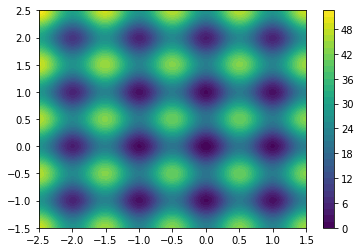

In [11]:
# Plot the testfunktion 
yplot2 = f(xplot_flat)
df = pd.DataFrame({'x.1': xplot[0].ravel(), 'x.2': xplot[1].ravel(), 'y': yplot2})
cmap = ListedColormap(sns.color_palette("viridis", n_colors=256).as_hex())

plt.contourf(df['x.1'].values.reshape((nplot_dim, nplot_dim)),
             df['x.2'].values.reshape((nplot_dim, nplot_dim)),
             df['y'].values.reshape((nplot_dim, nplot_dim)),
             levels=50,
             cmap=cmap)

plt.colorbar()
plt.show()


In [12]:
error = model.score(x, y)

# ??
obj = model.dual_coef_
support_vectors = model.support_vectors_
K = rbf_kernel(support_vectors, support_vectors)
dual_coefficients = model.dual_coef_.ravel()
obj = 0.5 * np.dot(dual_coefficients, np.dot(K, dual_coefficients))
obj -= np.sum(dual_coefficients)

print("Fehlerwert:", error)
print("Objektivwert:", obj)

Fehlerwert: 0.056599755929297335
Objektivwert: 12.459859429920108


In [13]:
# Implement NEWUOA Algorithm 
def fun(pars):
    model = SVR(epsilon=10**pars[0], C=10**pars[1], tol=10**pars[2])
    model.fit(x, y)
    return model.score(x, y)

def afun(x):
    
    return fun(x)


x = np.random.uniform(low=-1, high=1, size=(100, 2))
y = f(x)

res = pf.newuoa(fun=fun, x0=[-2.5, 0, -2.5])
print(res)

pf.pdfo

   fhist: [ 0.06291395  0.06314825  0.45099281  0.06294439  0.06288946  0.00675551
  0.06291515  0.01543256  0.0067575   0.00458994  0.00175671 -0.00052634
 -0.00132158 -0.00172898 -0.00193456 -0.0019209  -0.00166093 -0.00208138
 -0.00223863 -0.00238172 -0.00250199 -0.00268365 -0.0029102  -0.00296653
 -0.00307216 -0.00308462 -0.00308114 -0.00307511 -0.00307257 -0.00309253
 -0.00308878 -0.00309288 -0.0030947  -0.00309598 -0.00309884 -0.00310385
 -0.00310833 -0.00311258 -0.00311877 -0.00312549 -0.00313589 -0.00314649
 -0.00314825 -0.00314523 -0.00315042 -0.00315289 -0.0031508  -0.00315358
 -0.00315457 -0.00315431 -0.00315497 -0.00315491 -0.00315489 -0.00315513
 -0.00315519 -0.00315517 -0.00315523 -0.00315532 -0.00315536 -0.0031555
 -0.00315559 -0.00315567 -0.00315585 -0.0031562  -0.00315685 -0.00315777
 -0.00315875 -0.00315931 -0.00315992 -0.00315999 -0.00316002 -0.00315996
 -0.00316002 -0.00316    -0.00315999 -0.00316003 -0.00316    -0.00315997
 -0.00316005 -0.00316004 -0.00316005 -0.00

<function pdfo._pdfo.pdfo(fun, x0, args=(), method=None, bounds=None, constraints=(), options=None)>

2.0 0.001 0.1


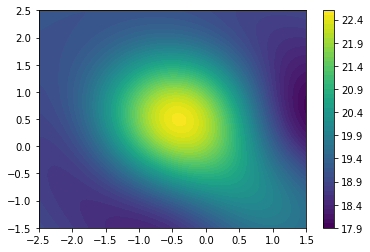

In [42]:

def fun(pars):
    model = SVR(C=10**pars[1], epsilon=10**pars[0], tol=10**pars[2])
    model.fit(x, y)
    return model.score(x, y)

def afun(x):
    
    return fun(x)

np.random.seed(123)

initial_params = [1.0, 1e-3, 0.1]
bound = [(0, None), (0, None), (0, None)]
options= {'ftarget': 0}

# Aufruf des Optimierungsverfahrens (NEWUOA-Algorithmus)
result = pf.pdfo(afun, initial_params, method='newuoa', options=options)
#result = pf.newuoa(afun, initial_params, options=options)

# Extrahieren der optimalen Parameter
optimal_params = result.x
C_opt, tol_opt, epsilon_opt = optimal_params

print(C_opt, tol_opt, epsilon_opt)

# Erstellen des Modells mit den optimalen Parametern
model = SVR(kernel='rbf', gamma='auto', C=C_opt, epsilon=epsilon_opt, tol=tol_opt)
model.fit(x, y)

np.random.seed(1)
yplot = model.predict(xplot_flat)

df = pd.DataFrame({'x.1': xplot[0].ravel(), 'x.2': xplot[1].ravel(), 'y': yplot})
cmap = ListedColormap(sns.color_palette("viridis", n_colors=256).as_hex())

plt.contourf(df['x.1'].values.reshape((nplot_dim, nplot_dim)),
             df['x.2'].values.reshape((nplot_dim, nplot_dim)),
             df['y'].values.reshape((nplot_dim, nplot_dim)),
             levels=50,
             cmap=cmap)

plt.colorbar()
plt.show()
